In [1]:
import pyLDAvis.gensim

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

en_sample_submission.csv
en_sample_submission.csv.zip
en_sample_submission_2.csv.zip
en_test.csv
en_test.csv.zip
en_test_2.csv.zip
en_train.csv
en_train.csv.zip



In [3]:
train = pd.read_csv('../input/en_train.csv')
test = pd.read_csv('../input/en_test.csv')

In [4]:
train.tail()

,sentence_id,token_id,class,before,after
9918436,748065,12,PLAIN,of,of
9918437,748065,13,PLAIN,the,the
9918438,748065,14,ORDINAL,19th,nineteenth
9918439,748065,15,PLAIN,century,century
9918440,748065,16,PUNCT,.,.


In [5]:
test.tail()

,sentence_id,token_id,before
1088559,69999,13,close
1088560,69999,14,to
1088561,69999,15,machine
1088562,69999,16,languages
1088563,69999,17,.


In [5]:
train['class'].unique()

array(['PLAIN', 'PUNCT', 'DATE', 'LETTERS', 'CARDINAL', 'VERBATIM',
       'DECIMAL', 'MEASURE', 'MONEY', 'ORDINAL', 'TIME', 'ELECTRONIC',
       'DIGIT', 'FRACTION', 'TELEPHONE', 'ADDRESS'], dtype=object)

In [6]:
train['class'].value_counts().sort_values(ascending = False)

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

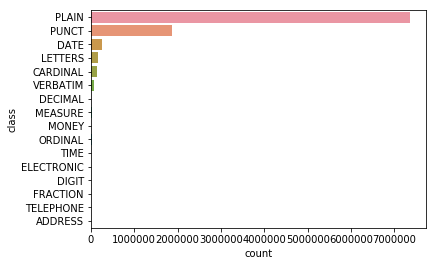

In [8]:
sns.countplot(y = train['class'],data = train)


In [9]:
train[train['class']=='PUNCT'].head()

,sentence_id,token_id,class,before,after
9,0,9,PUNCT,.,.
17,1,7,PUNCT,.,.
25,2,7,PUNCT,",",","
28,2,10,PUNCT,",",","
31,2,13,PUNCT,",",","


In [10]:
train[train['class']=='DATE'].head()

,sentence_id,token_id,class,before,after
10,1,0,DATE,2006,two thousand six
51,3,7,DATE,2007,two thousand seven
80,5,0,DATE,2008,two thousand eight
111,8,1,DATE,4 March 2014,the fourth of march twenty fourteen
147,11,1,DATE,"April 10, 2013",april tenth twenty thirteen


In [11]:
train[train['class']=='LETTERS'].head()

,sentence_id,token_id,class,before,after
11,1,1,LETTERS,IUCN,i u c n
115,9,2,LETTERS,BC,b c
159,14,2,LETTERS,ALCS,a l c s
201,18,2,LETTERS,C.,c
205,18,6,LETTERS,J.,j


In [13]:
train[train['class']=='CARDINAL'].head()

,sentence_id,token_id,class,before,after
95,6,3,CARDINAL,91,ninety one
116,9,3,CARDINAL,3,three
143,10,8,CARDINAL,35,thirty five
161,14,4,CARDINAL,2,two
280,24,4,CARDINAL,3,three


In [14]:
train[train['class']=='VERBATIM'].head()

,sentence_id,token_id,class,before,after
162,14,5,VERBATIM,-,-
279,24,3,VERBATIM,#,number
724,54,11,VERBATIM,&,and
980,75,2,VERBATIM,サ,サ
981,75,3,VERBATIM,イ,イ


In [15]:
train[train['class']=='DECIMAL'].head()

,sentence_id,token_id,class,before,after
1058,81,4,DECIMAL,.161,point one six one
1067,81,13,DECIMAL,.6,point six
2280,179,15,DECIMAL,1.6,one point six
2449,192,7,DECIMAL,.267,point two six seven
2454,192,12,DECIMAL,.266,point two six six


In [16]:
train[train['class']=='MEASURE'].head()

,sentence_id,token_id,class,before,after
1654,130,12,MEASURE,100 m,one hundred meters
2120,167,4,MEASURE,60 km,sixty kilometers
3266,263,4,MEASURE,60%,sixty percent
4024,331,7,MEASURE,16.4%,sixteen point four percent
4032,331,15,MEASURE,57.6%,fifty seven point six percent


In [17]:
train[train['class']=='MONEY'].head()

,sentence_id,token_id,class,before,after
1851,142,10,MONEY,"$22,750",twenty two thousand seven hundred fifty dollars
1861,142,20,MONEY,"$29,583",twenty nine thousand five hundred eighty three...
5305,432,7,MONEY,"$1,000,000",one million dollars
5311,432,13,MONEY,"$1,070,000",one million seventy thousand dollars
8727,709,6,MONEY,"$29,545",twenty nine thousand five hundred forty five d...


In [18]:
train[train['class']=='ORDINAL'].head()

,sentence_id,token_id,class,before,after
2231,174,7,ORDINAL,4th,fourth
5625,453,5,ORDINAL,21st,twenty first
6266,508,1,ORDINAL,V.,the fifth
7668,627,3,ORDINAL,I,the first
8085,661,16,ORDINAL,18th,eighteenth


In [19]:
train[train['class']=='TIME'].head()

,sentence_id,token_id,class,before,after
3005,243,12,TIME,3:00 pm,three p m
3007,243,14,TIME,3:00 am,three a m
4538,371,12,TIME,8 a.m.,eight a m
8320,681,7,TIME,09:45,nine forty five
34061,2705,5,TIME,02.26,two twenty six


Ok till now we saw how each class  wrods are represented before and after and now we got some idea on whole data. isnt it..?

Now lets looks how the sample submission file should be and we'll move in that direction ok.



In [12]:
sample_submission = pd.read_csv("../input/en_sample_submission.csv")
sample_submission.head()

,id,after
0,0_0,Another
1,0_1,religious
2,0_2,family
3,0_3,is
4,0_4,of


If you observ carefully there are actually sentances in the train and test file. At first even i thought theses are chunks of words which represnted before and after convetions.

I found sentances by grouping sentance ids together. I'll show you some images which will be easier to understand the data.

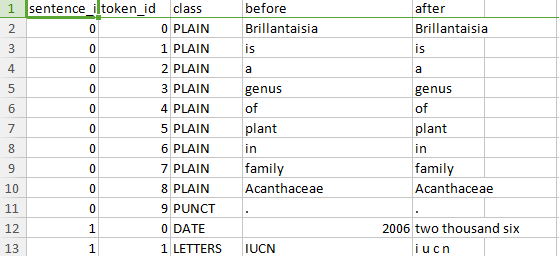

This is ho3 it looks the original train data set.

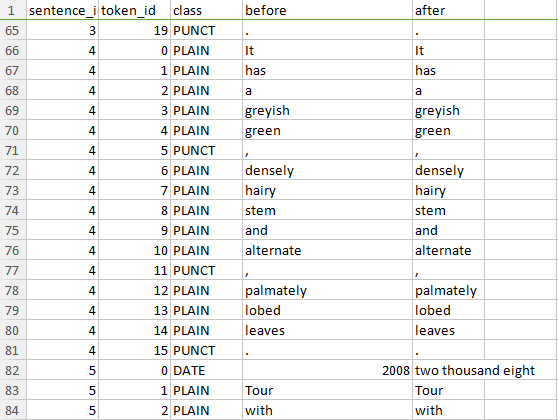

If you club all the senteance-id 4 there is a sentance in it. 


In [21]:
train.groupby("sentence_id")["sentence_id"].count().head()

sentence_id
0    10
1     8
2    26
3    20
4    16
Name: sentence_id, dtype: int64

In [24]:
train['sentences']

0          10.0
1           8.0
2          26.0
3          20.0
4          16.0
5          12.0
6          14.0
7           4.0
8           3.0
9          22.0
10         11.0
11          3.0
12          4.0
13          4.0
14          9.0
15          7.0
16          9.0
17         17.0
18         24.0
19          6.0
20         11.0
21         15.0
22          3.0
23         18.0
24         11.0
25         22.0
26         14.0
27         22.0
28         20.0
29          4.0
           ... 
9918411     NaN
9918412     NaN
9918413     NaN
9918414     NaN
9918415     NaN
9918416     NaN
9918417     NaN
9918418     NaN
9918419     NaN
9918420     NaN
9918421     NaN
9918422     NaN
9918423     NaN
9918424     NaN
9918425     NaN
9918426     NaN
9918427     NaN
9918428     NaN
9918429     NaN
9918430     NaN
9918431     NaN
9918432     NaN
9918433     NaN
9918434     NaN
9918435     NaN
9918436     NaN
9918437     NaN
9918438     NaN
9918439     NaN
9918440     NaN
Name: sentences, Length:

In [13]:
train['sentences'] = train.groupby("sentence_id")["sentence_id"].count()
train['sentences'].describe()

count    748066.000000
mean         13.258778
std           6.071624
min           2.000000
25%           8.000000
50%          13.000000
75%          18.000000
max         256.000000
Name: sentences, dtype: float64

so here what we got is, minimum words in a sentance are 2 and maximum words in a sentance are 256 and on an avg every sentance consists of 13 words.

i mean every setance_id consists of 13 token_ids and max is 256 and min is 2 only.

In [14]:
test['sentences'] = test.groupby("sentence_id")["sentence_id"].count()
test['sentences'].describe()

count    70000.000000
mean        15.550914
std          5.763962
min          2.000000
25%         11.000000
50%         16.000000
75%         20.000000
max        249.000000
Name: sentences, dtype: float64

same applies to test set as said in train set. Now we'll see in visual way.

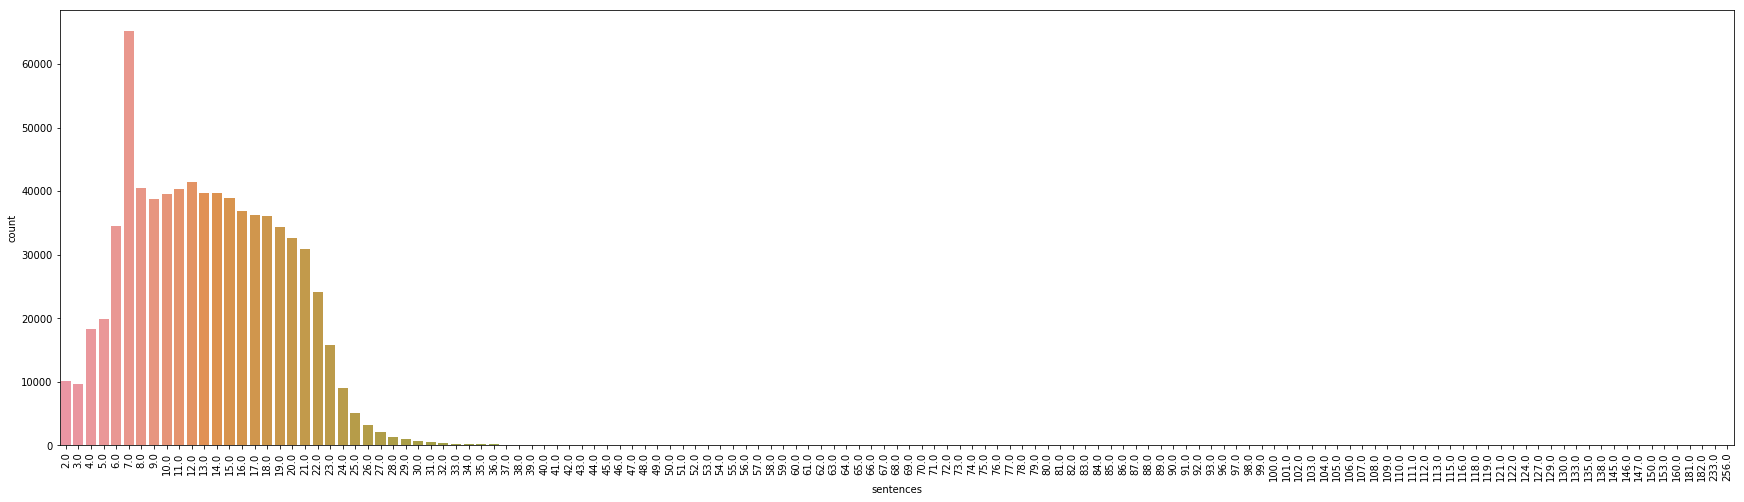

In [15]:
plt.figure(figsize=(30,8))
sns.countplot(x = train['sentences'],data = train)
plt.xticks(rotation = 90)
plt.show()

In [28]:
train[train['sentence_id'] == 1]

,sentence_id,token_id,class,before,after,sentences
10,1,0,DATE,2006,two thousand six,11.0
11,1,1,LETTERS,IUCN,i u c n,3.0
12,1,2,PLAIN,Red,Red,4.0
13,1,3,PLAIN,List,List,4.0
14,1,4,PLAIN,of,of,9.0
15,1,5,PLAIN,Threatened,Threatened,7.0
16,1,6,PLAIN,Species,Species,9.0
17,1,7,PUNCT,.,.,17.0


In [17]:
train[train['sentence_id'] == 1]

,sentence_id,token_id,class,before,after,sentences
10,1,0,DATE,2006,two thousand six,11.0
11,1,1,LETTERS,IUCN,i u c n,3.0
12,1,2,PLAIN,Red,Red,4.0
13,1,3,PLAIN,List,List,4.0
14,1,4,PLAIN,of,of,9.0
15,1,5,PLAIN,Threatened,Threatened,7.0
16,1,6,PLAIN,Species,Species,9.0
17,1,7,PUNCT,.,.,17.0


In [ ]:
train

In [24]:
train[train['sentences'] ==256]

,sentence_id,token_id,class,before,after,sentences
520453,41699,11,CARDINAL,30,thirty,256.0


In [25]:
train[train['sentence_id']==520453]

,sentence_id,token_id,class,before,after,sentences
6852171,520453,0,PLAIN,R,R,NaN
6852172,520453,1,PUNCT,.,.,NaN
6852173,520453,2,PLAIN,Naroll,Naroll,NaN
6852174,520453,3,PUNCT,",",",",NaN
6852175,520453,4,LETTERS,V.L.,v l,NaN
6852176,520453,5,PLAIN,Bullough,Bullough,NaN
6852177,520453,6,VERBATIM,&,and,NaN
6852178,520453,7,LETTERS,F.,f,NaN
6852179,520453,8,PLAIN,Naroll,Naroll,NaN
6852180,520453,9,PUNCT,",",",",NaN


we'll form this as sentance ok

In [26]:
max_sentance = train[train['sentence_id']==520453].before.values.tolist()
max_sentance = ' '.join(max_sentance)
max_sentance

"R . Naroll , V.L. Bullough & F. Naroll , Military Deterrence in History : A Pilot Cross Historical Survey , SUNY Press , 1974 H . Temporini & W. Haase , Aufstieg und Niedergang der romischen Welt : Geschichte und Kultur Roms im spiegel der neueren Forschung , Walter de GruyterE . Yarshater , The Cambridge History of Iran , Cambridge University Press , 1983 R . Syme & A.R. Birley , Anatolica : studies in Strabo , Oxford University Press , 1995 W.G. Sayles , Ancient Coin Collecting IV : Roman Provincial Coins ( Google eBook ) , F +W Media , Inc , 1998 P.M. Swan , The Augustan Succession : An Historical Commentary on Cassius Dio's Roman History , Books 55 - 56 ( 9 B.C. - A.D. 14 ) ( Google eBook ) , Oxford University Press , 2004 R.G. Hovannisian , The Armenian People from Ancient to Modern Times , Volume 1 : The Dynastic Periods : From Antiquity to the Fourteenth Century , Palgrave Macmillan , 2004 V.M. Kurkjian , A History of Armenia , Indo European Publishing , 2008 M.A. Ehrlich , Enc

Now we'll see how small sentance looks like.

In [27]:
train[train['sentences']==2]

,sentence_id,token_id,class,before,after,sentences
41,2,23,PLAIN,pop,pop,2.0
109,7,3,PUNCT,.,.,2.0
144,10,9,PUNCT,),),2.0
162,14,5,VERBATIM,-,-,2.0
164,14,7,PLAIN,Tigers,Tigers,2.0
222,18,23,PUNCT,.,.,2.0
228,19,5,PUNCT,.,.,2.0
289,25,2,PLAIN,Two,Two,2.0
304,25,17,PLAIN,result,result,2.0
323,27,0,PLAIN,When,When,2.0


these are the values which have only 2 words. lets check.

In [28]:
min_sentance = train[train['sentence_id']==41].before.values.tolist()
min_sentance = ' '.join(min_sentance)
min_sentance #you can replace the above number to get different sentances which have 2 words only.

'August 16, 2005 .'